![My Image](./image/customer.jpg)
<!-- ![Alt text](https://img.freepik.com/free-vector/flat-design-credit-assessment-with-diagrams_23-2149163755.jpg?t=st=1729239212~exp=1729242812~hmac=d3fccd372747ada74cd9dfc898aabf4826bb21a6509c22e1c1f5a8885bfa282c&w=740) -->


# **About Dataset**
### **Context**
### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### **Content**
### Attributes

#### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
#### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
#### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
#### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month
#### Target
- Need to perform clustering to summarize customer segments.

#### Acknowledgement
The dataset for this project is provided by Dr. Omar Romero-Hernandez.

#### Inspiration
happy learning….

Hope you like this dataset please don't forget to like this notebook

---

- **About the author:** Sajjad Ali Shah
- **LinkedIn:** [LinkedIn Profile](https://www.linkedin.com/in/sajjad-ali-shah47/)
- **Dataset link:** [Customer Personality Analysis Dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?select=marketing_campaign.csv)

---

<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">📚</span> 1. Import Necessary Libraries
    </h2>
</div>


In [52]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import warnings
warnings.filterwarnings('ignore')


In [53]:
# Read the file
df=pd.read_csv("./data/marketing_campaign.csv")
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [54]:
# Read the tab-separated CSV file and display the first few rows of the DataFrame
df = pd.read_csv("./data/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


- This specifies that the file uses a tab character (\t) as the separator between columns instead of the default comma (,). This is common in TSV (Tab-Separated Values) files

In [55]:
# Shape of the data
df.shape

(2240, 29)

In [56]:
# Descriptive statistics
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [57]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🧹</span> 2. Data Cleaning
    </h2>
</div>


In [58]:
# Check for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [59]:
df.drop(["Z_CostContact","Z_Revenue"],axis=1,inplace=True)

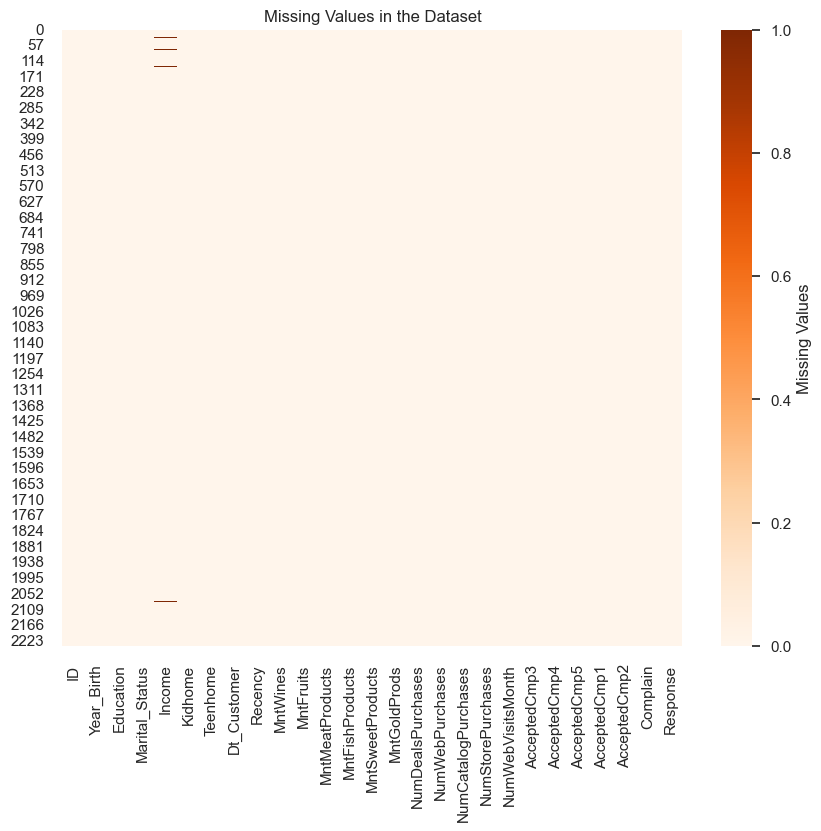

In [60]:
# Visualize the missing values
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar_kws={'label': 'Missing Values'}, cmap='Oranges')
plt.title('Missing Values in the Dataset')
plt.show()


From the above output, we can conclude and note that:

- There are missing values in income

In [61]:
# Drop the null values
df=df.dropna()

In [62]:
print(f"Missing values in data: {df.isnull().sum().sum()}")

Missing values in data: 0


In [63]:
# Combining columns together to reduce number of dimensions
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [64]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Expenses', 'TotalAcceptedCmp',
       'TotalNumPurchases'],
      dtype='object')

In [65]:
# # Categorize columns into three groups based on their data type
# binary_columns = [col for col in df.columns if df[col].nunique() == 2]
# categorical_columns = [col for col in df.columns if df[col].nunique() > 2 and df[col].nunique() < 10]
# numerical_columns = [col for col in df.select_dtypes(include=['number']).columns if col not in binary_columns + categorical_columns]

# # Print the categorized columns
# print("Binary columns:", binary_columns)
# print("Categorical columns:", categorical_columns)
# print("Numerical columns:", numerical_columns)

<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🔍</span> 3. Explore Data
    </h2>
</div>


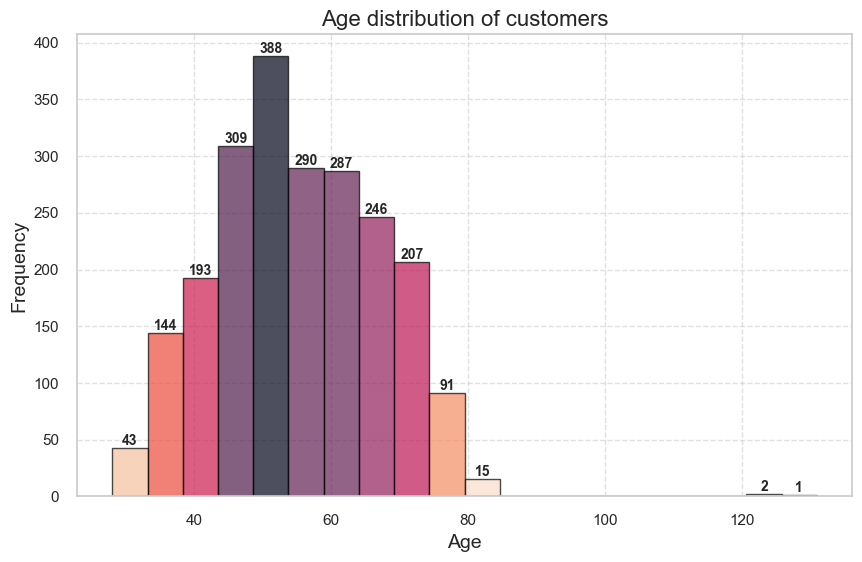

In [66]:
df['Age'] = 2024 - df['Year_Birth']

plt.figure(figsize=(10, 6))

# Normalize color by the bar height
n, bins, patches = plt.hist(df['Age'], bins=20, color='blue', alpha=0.7, edgecolor='black')
for i in range(len(patches)):
    patches[i].set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(n[i] / max(n)))
    if n[i] > 0:
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i], int(n[i]), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Age distribution of customers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<div style="border: 1px solid #324D5C; padding: 20px; border-radius: 10px; color: #333; font-size: 1em;">

### Customer Age Group Breakdown:

- 🎂 **30-40**: 193 customers, representing younger adults with potential for long-term engagement.
- 🎂 **40-50**: 309 customers, a growing segment approaching middle age.
- 🎂 **50-60**: 388 customers, the largest group, indicating the core demographic is middle-aged.
- 🎂 **60-70**: 290 customers, showing strong representation in older adulthood.
- 🎂 **70-80**: 246 customers, continuing a steady trend in the senior category.
- 🎂 **80-90**: 91 customers, indicating some engagement in advanced age.
- 🎂 **90+**: 18 customers, a very small segment of very elderly customers.

### Key Observations:

- 💼 **Core Demographic (50-60)**: This age group forms the largest customer base, suggesting that products/services might appeal most to middle-aged individuals.
- 📉 **Declining Trend with Age**: As age increases beyond 60, the number of customers gradually decreases, indicating less engagement among older seniors.
- 📈 **Potential Growth Areas**: The 30-40 age group could be nurtured for long-term loyalty, as they may have different needs and preferences.
- 🧓 **Senior Presence**: While numbers decrease with age, there is still a notable segment in the 60-80 range, suggesting that targeted offerings for senior customers could be beneficial.
- ⚠️ **Outliers**: There are very few customers above 90, possibly indicating limited engagement from extremely elderly individuals.

</div>


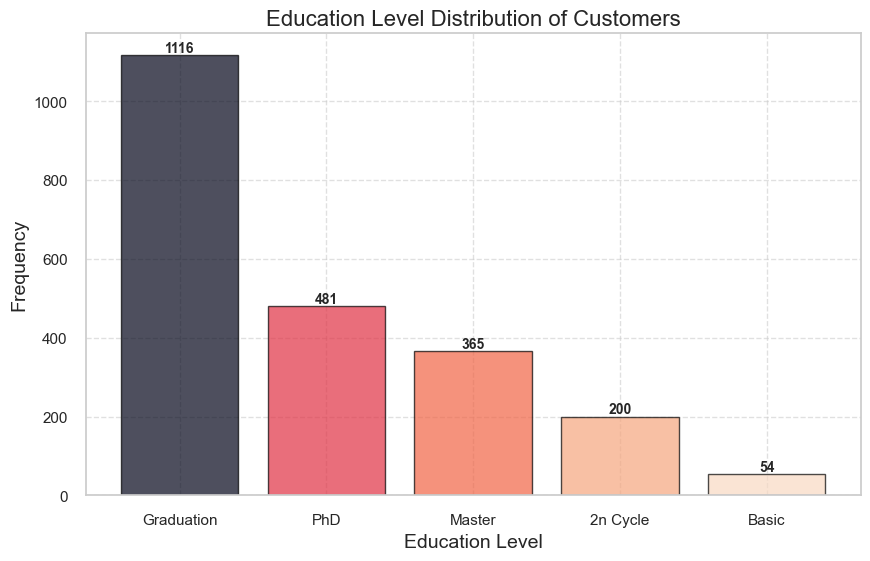

In [67]:
plt.figure(figsize=(10, 6))
# Count occurrences of each education level
education_counts = df['Education'].value_counts()
# Normalize color by the bar height
bars = plt.bar(education_counts.index, education_counts.values, color='blue', alpha=0.7, edgecolor='black')
for i, bar in enumerate(bars):
    bar.set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(education_counts.values[i] / max(education_counts.values)))
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Education Level Distribution of Customers', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<div style="border: 1px solid #324D5C; padding: 20px; border-radius: 10px; color: #333; font-size: 1em;">

### ✨ Breakdown of Customer Education Levels:

- 📊 **Graduation**: 1116 customers, forming the largest group, indicating a high level of educational attainment.
- 📊 **PhD**: 481 customers, a significant segment with advanced academic qualifications.
- 📊 **Master**: 365 customers, making up a considerable portion of the customer base with postgraduate education.
- 📊 **2nd Cycle**: 200 customers, representing individuals with some higher education but possibly not a completed degree.
- 📊 **Basic**: 54 customers, a smaller group with basic education levels.

### Insights:

- 🎓 **Higher Education**: The majority of customers have attained at least a graduate level of education, indicating that the customer base is highly educated.
- 📉 **Lower Levels**: A much smaller percentage of customers have only a basic education, suggesting a market with a predominantly higher-educated demographic.
- 🔍 **Targeting Potential**: Strategies can be tailored to appeal to customers with higher education backgrounds, as they form the majority.

</div>


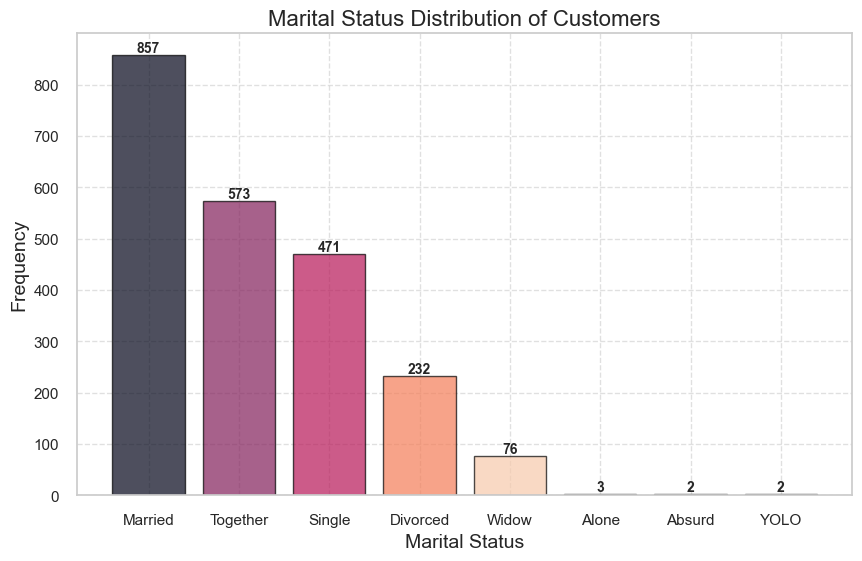

In [68]:
# Create a figure for the Marital_Status plot
plt.figure(figsize=(10, 6))

# Marital status distribution
marital_counts = df['Marital_Status'].value_counts()
bars_marital = plt.bar(marital_counts.index, marital_counts.values, color='blue', alpha=0.7, edgecolor='black')

# Apply the same color palette from 'Education' to 'Marital_Status'
for i, bar in enumerate(bars_marital):
    bar.set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(marital_counts.values[i] / max(marital_counts.values)))
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Marital Status Distribution of Customers', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<div style="border: 1px solid #324D5C; padding: 20px; border-radius: 10px; color: #333; font-size: 1em;">

### ✨Breakdown of Customer Marital Status:

- 📊 **Married**: 857 customers, representing the largest group, indicating a substantial customer base of married individuals.
- 📊 **Together**: 573 customers, a significant segment who are in relationships.
- 📊 **Single**: 471 customers, making up a notable part of the customer base.
- 📊 **Divorced**: 232 customers, showing a moderate presence of divorced individuals.
- 📊 **Widow**: 76 customers, a smaller but still relevant group.
- 📊 **Alone**: 3 customers, a very small segment of customers who identify as alone.
- 📊 **Absurd and YOLO**: 2 customers each, likely representing unique or non-standard entries.

### Insights:

- 👥 **Married and Together**: These two categories form the majority, possibly indicating a preference for products/services appealing to partnered individuals.
- 📈 **Single and Divorced**: Although smaller in number, they still represent a considerable segment that could be targeted with specific marketing strategies.
- ⚠️ **Outliers**: Categories like "Absurd" and "YOLO" may need review for data quality or validation purposes.

</div>


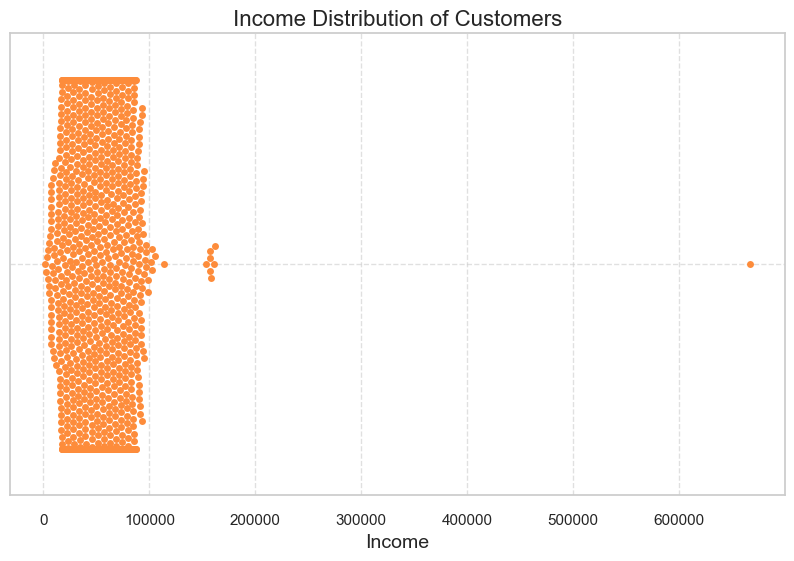

In [69]:
# Create a figure for the Income swarm plot
plt.figure(figsize=(10, 6))

# Swarm plot for Income distribution
sns.swarmplot(x=df['Income'], color=sns.color_palette("Oranges", 1)[0])

# Adding title and labels
plt.title('Income Distribution of Customers', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


In [70]:
# Calculate counts and align indices
kidhome_counts = df['Kidhome'].value_counts().sort_index()
teenhome_counts = df['Teenhome'].value_counts().sort_index()
all_indices = sorted(set(kidhome_counts.index).union(set(teenhome_counts.index)))
kidhome_counts = kidhome_counts.reindex(all_indices, fill_value=0)
teenhome_counts = teenhome_counts.reindex(all_indices, fill_value=0)
# Create traces for Kidhome and Teenhome with the specified colors
trace_kidhome = go.Bar(
    x=all_indices,
    y=kidhome_counts.values,
    name='Kidhome',
    marker=dict(color='#FF6500')  # Using color #FA812F for Kidhome
)
trace_teenhome = go.Bar(
    x=all_indices,
    y=teenhome_counts.values,
    name='Teenhome',
    marker=dict(color='#CC2B52')  # Using color #FA4032 for Teenhome
)
# Create the figure
fig = go.Figure(data=[trace_kidhome, trace_teenhome])

# Update layout
fig.update_layout(
    title='Comparison of Kidhome and Teenhome Distributions',
    xaxis_title='Number of Kids/Teens at Home',
    yaxis_title='Frequency',
    barmode='group',
    bargap=0.2,
    bargroupgap=0.1
)
# Show the figure
fig.show()


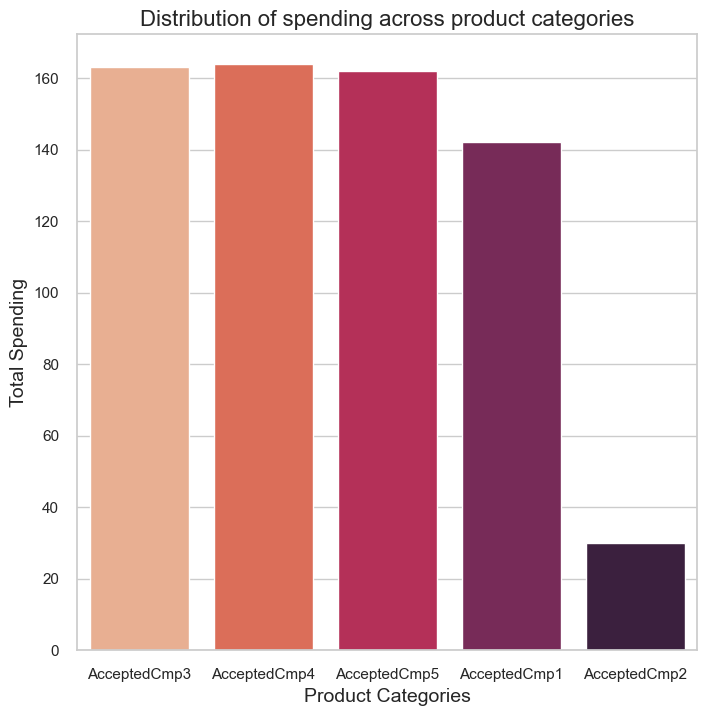

In [71]:
product_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']
# Sum of each product category
# Sum of each product category
total_spend = df[product_columns].sum()

# Colors and plot size
colors = sns.color_palette("rocket_r", len(product_columns))
plt.figure(figsize=(8, 8))

# Bar plot for spending distribution
sns.barplot(x=product_columns, y=total_spend, palette=colors)

# Labels and title
plt.xlabel('Product Categories', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)
plt.title('Distribution of spending across product categories', fontsize=16)

plt.show()

In [72]:
product_columns = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
# Sum of each product category
total_spend = df[product_columns].sum()
# Create a DataFrame for Plotly
data = {
    'Product Category': product_columns,
    'Total Spending': total_spend
}
# Plotly Donut Chart with labels outside
fig = px.pie(data, 
             names='Product Category', 
             values='Total Spending', 
             title='Distribution of Purchases and Web Visits across Product Categories',
             color_discrete_sequence=px.colors.sequential.Reds)
# Adjust to make it a donut chart and set labels outside
fig.update_traces(hole=0.4, textinfo='percent', textposition='outside', textfont_size=14)
# Update title
fig.update_layout(title_font_size=16)

fig.show()

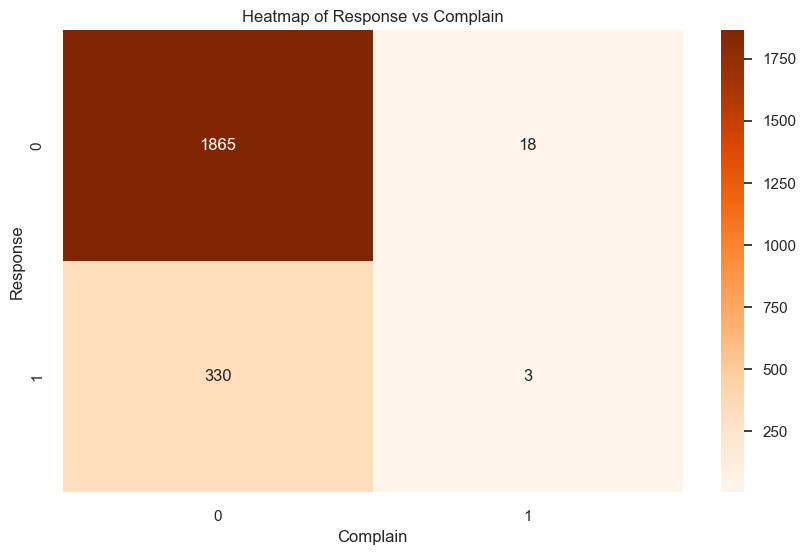

In [73]:
# Create a contingency table
contingency_table = pd.crosstab(df['Response'], df['Complain'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.title('Heatmap of Response vs Complain')
plt.xlabel('Complain')
plt.ylabel('Response')
plt.show()

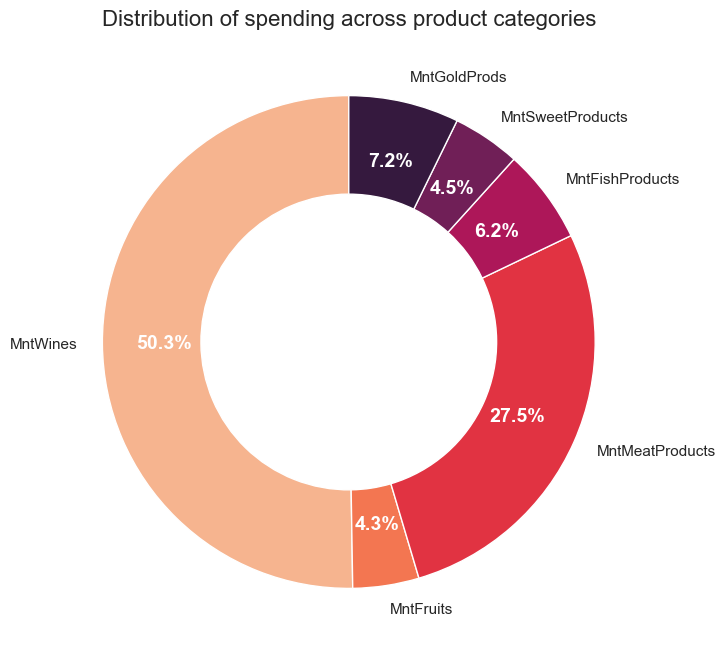

In [74]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spend = df[product_columns].sum()


colors = sns.color_palette("rocket_r", len(product_columns))
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(total_spend, labels=product_columns, autopct='%1.1f%%', 
                                   startangle=90, colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.75)
for autotext in autotexts:
    autotext.set_color('white')  # white for better contrast
    autotext.set_fontsize(14)    
    autotext.set_weight('bold')  

# Add title
plt.title('Distribution of spending across product categories', fontsize=16)

plt.show()

<div style="border: 1px solid #324D5C; padding: 20px; border-radius: 10px; color: #333; font-size: 1em;">

### Spending Breakdown by Category:

- 🍷 **MntWines**: 50.3%, indicating that wine purchases dominate the spending, suggesting high interest in this product category.
- 🍖 **MntMeatProducts**: 27.5%, representing a significant portion of spending, indicating meat products are also highly popular.
- 🐟 **MntFishProducts**: 6.2%, a smaller segment showing moderate interest in fish products.
- 💰 **MntGoldProds**: 7.2%, showing notable spending on premium or luxury products.
- 🍬 **MntSweetProducts**: 4.5%, indicating some interest in sweet products, but less prominent.
- 🍎 **MntFruits**: 4.3%, suggesting the lowest level of spending in this category.

### Key Observations:

- 💼 **Core Spending Category (MntWines)**: Wine products make up over half of the total spending, indicating a strong preference or demand for this product category among customers.
- 📉 **Lower Spending Categories**: MntFruits and MntSweetProducts account for the smallest portions of spending, possibly indicating less demand for these items.
- 📈 **Potential Growth Areas**: MntMeatProducts represents a significant part of spending, so promotions or targeted campaigns in this area could be effective.
- 🏆 **High-Value Products**: MntGoldProds has a reasonable share, suggesting customer interest in premium products.

</div>


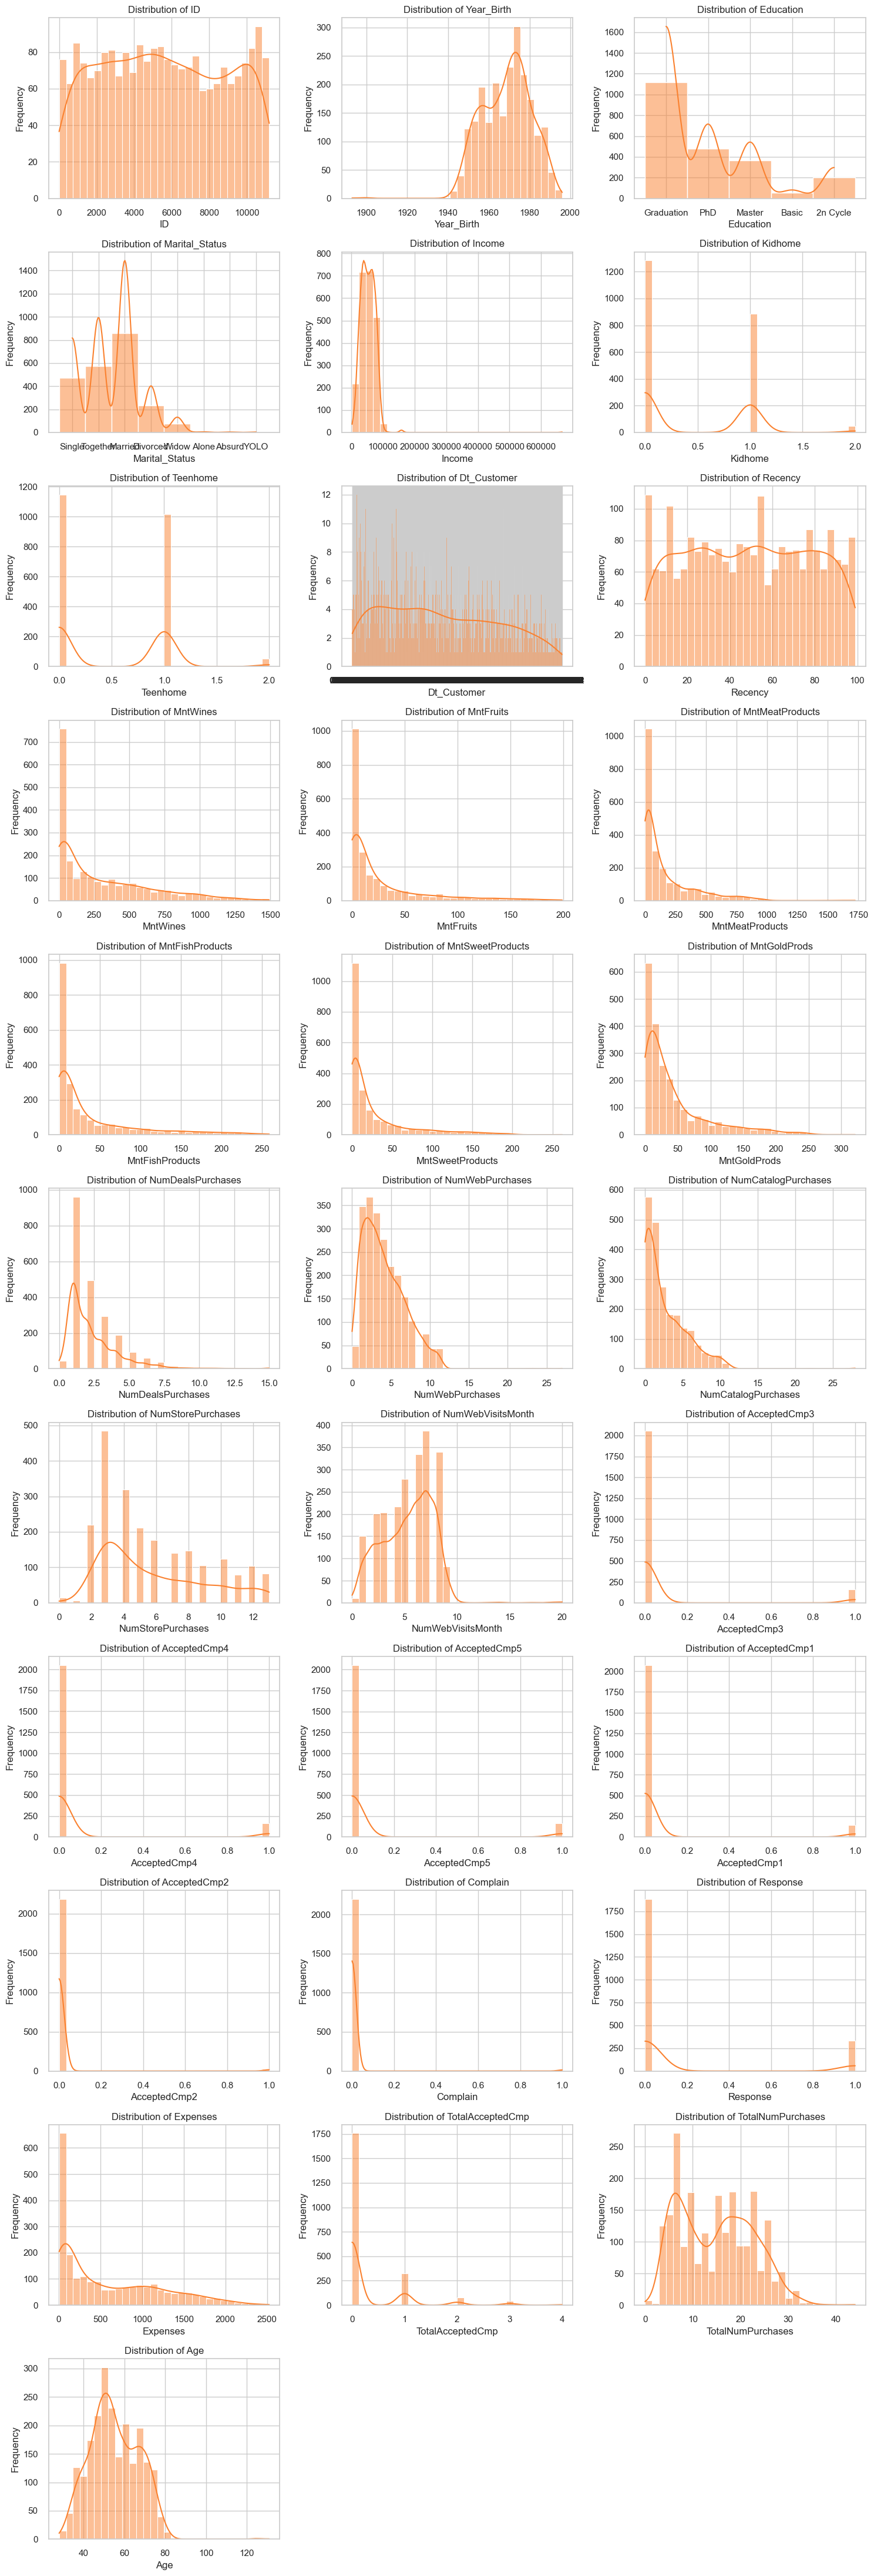

In [75]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Define the color to be used for all plots
plot_color = '#FA812F'

# Create a figure with subplots
num_cols = len(df.columns)
cols_per_row = 3  # Adjust this for the number of plots per row
num_rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 4))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through the columns and create a distplot for each
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color=plot_color, bins=30)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if the number of columns is not a perfect multiple of cols_per_row
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">⚙️</span> 4. DATA PREPROCESSING
    </h2>
</div>


In [76]:
# list of categorical columns
cat_df = list(df.select_dtypes(include=["object"]).columns)

# print the list of categorical columns
print(cat_df)

['Education', 'Marital_Status', 'Dt_Customer']


In [77]:
# label encoding for the categorical columns
LE = LabelEncoder()
# encoding the categorical columns
for col in df:
    if df[col].dtype == 'object':
        df[col] = LE.fit_transform(df[col])

In [78]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [79]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenses,TotalAcceptedCmp,TotalNumPurchases,Age
0,-0.019809,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,-1.307032,0.310532,0.978226,...,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,1.675488,-0.439265,1.319446,0.986443
1,-1.051009,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.901325,-0.380509,-0.872024,...,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.962358,-0.439265,-1.157987,1.236801
2,-0.445526,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,0.610855,-0.795134,0.358511,...,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.280250,-0.439265,0.797881,0.318822
3,0.182737,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.680031,-0.795134,-0.872024,...,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.919224,-0.439265,-0.897205,-1.266777
4,-0.081373,1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,0.326333,1.554407,-0.391671,...,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.307044,-0.439265,0.537099,-1.016420


<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">⬇️</span> 5. DIMENSIONALITY REDUCTION
    </h2>
</div>


In [80]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
# PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["Education","Income", "Kidhome"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2216.0,8.336693e-17,2.800053,-4.718281,-2.668870,-0.544600,2.455937,7.591396
Income,2216.0,-5.450914e-17,1.600757,-5.674604,-1.250454,0.016646,1.256539,4.190973
Kidhome,2216.0,9.619261e-18,1.332803,-6.574012,-0.865057,-0.018538,0.781740,5.758997


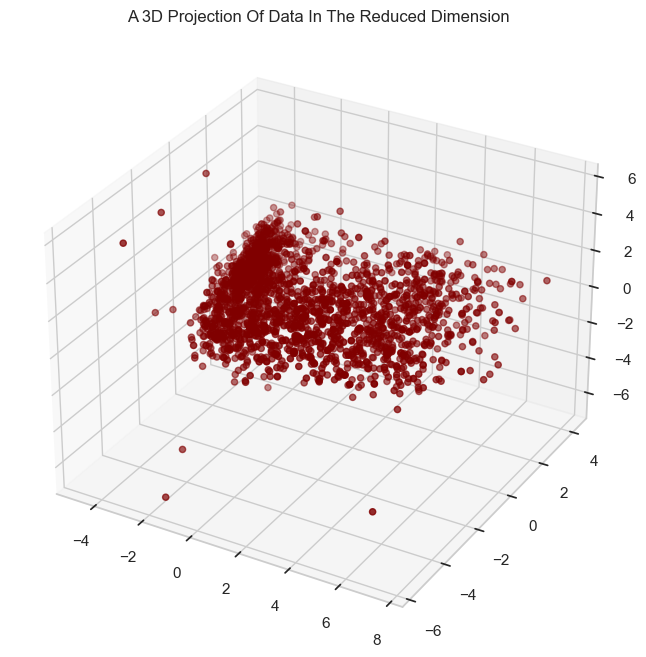

In [81]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["Education"]
y =PCA_ds["Income"]
z =PCA_ds["Kidhome"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">🧩</span> 6. CLUSTERING
    </h2>
</div>


In [82]:
# # Quick examination of elbow method to find numbers of clusters to make.
# print('Elbow Method to determine the number of clusters to be formed:')
# Elbow_M = KElbowVisualizer(KMeans(), k=10)
# Elbow_M.fit(PCA_ds)
# Elbow_M.show()

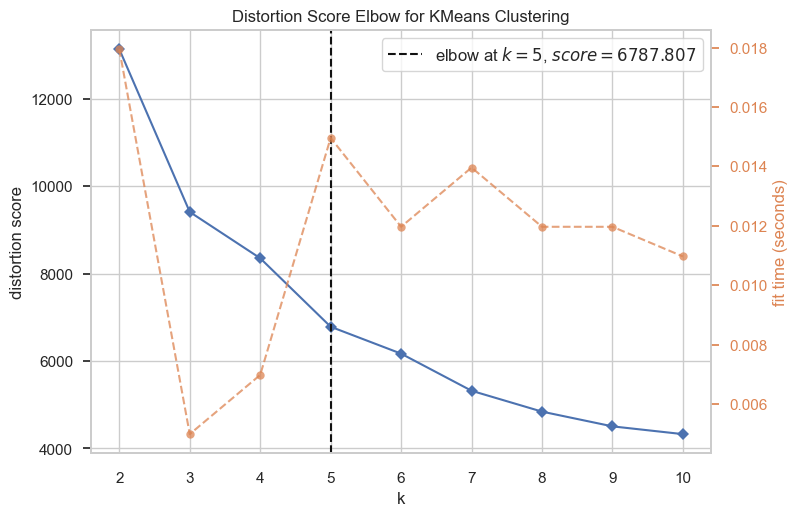

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(PCA_ds)        # Fit the data to the visualizer
visualizer.show() 

In [84]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

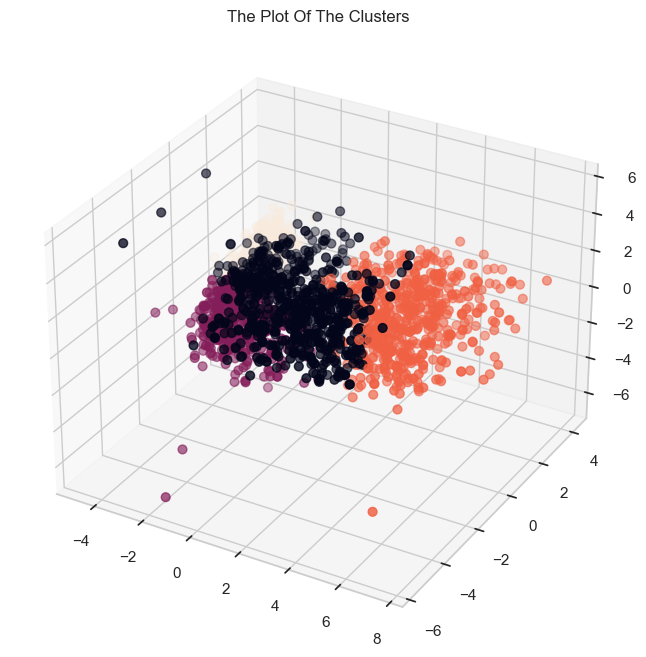

In [85]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">📊</span> 7. EVALUATING MODELS
    </h2>
</div>


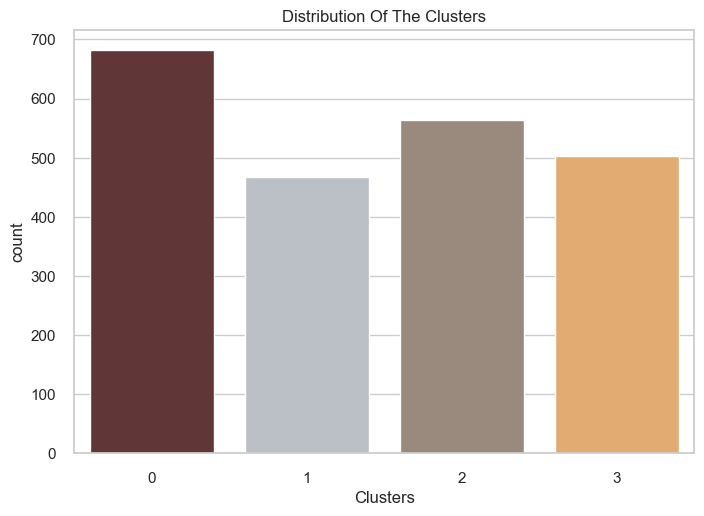

In [86]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [87]:
# pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
# pl.set_title("Cluster's Profile Based On Income And Spending")
# plt.legend()
# plt.show()

In [88]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Expenses', 'TotalAcceptedCmp',
       'TotalNumPurchases', 'Age', 'Clusters'],
      dtype='object')

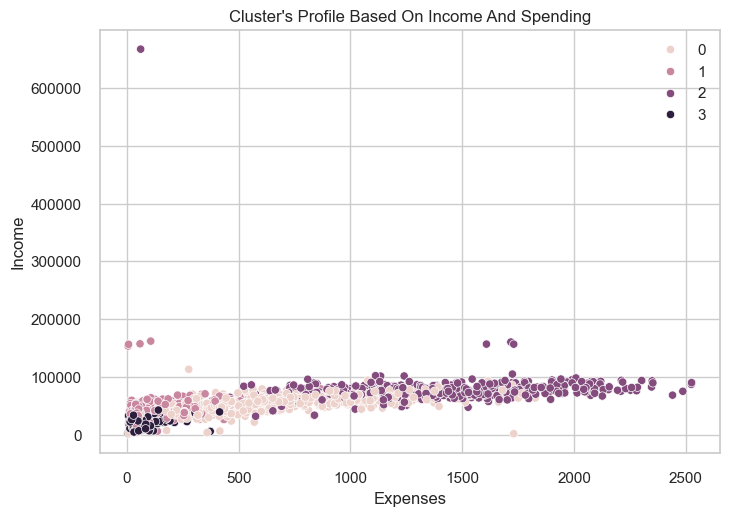

In [89]:
pl = sns.scatterplot(data = df,x=df["Expenses"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

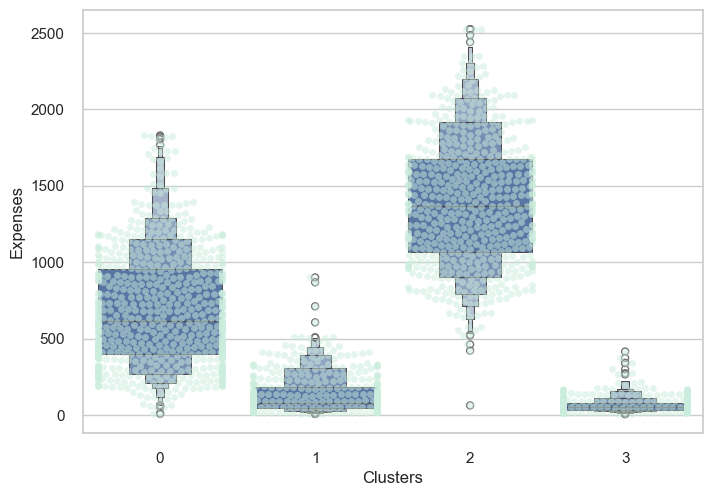

In [91]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Expenses"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Expenses"])
plt.show()

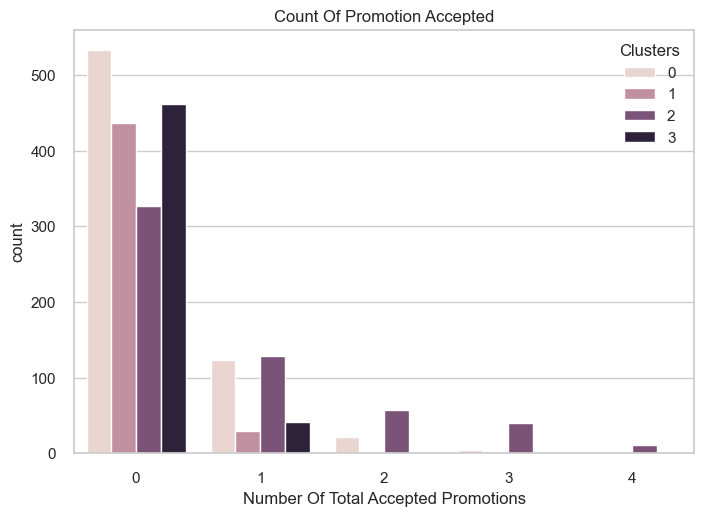

In [92]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["TotalAcceptedCmp"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

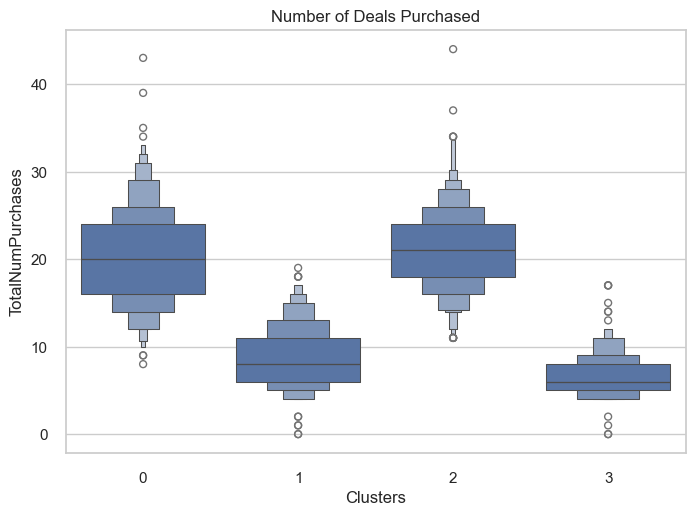

In [93]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["TotalNumPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

<Axes: >

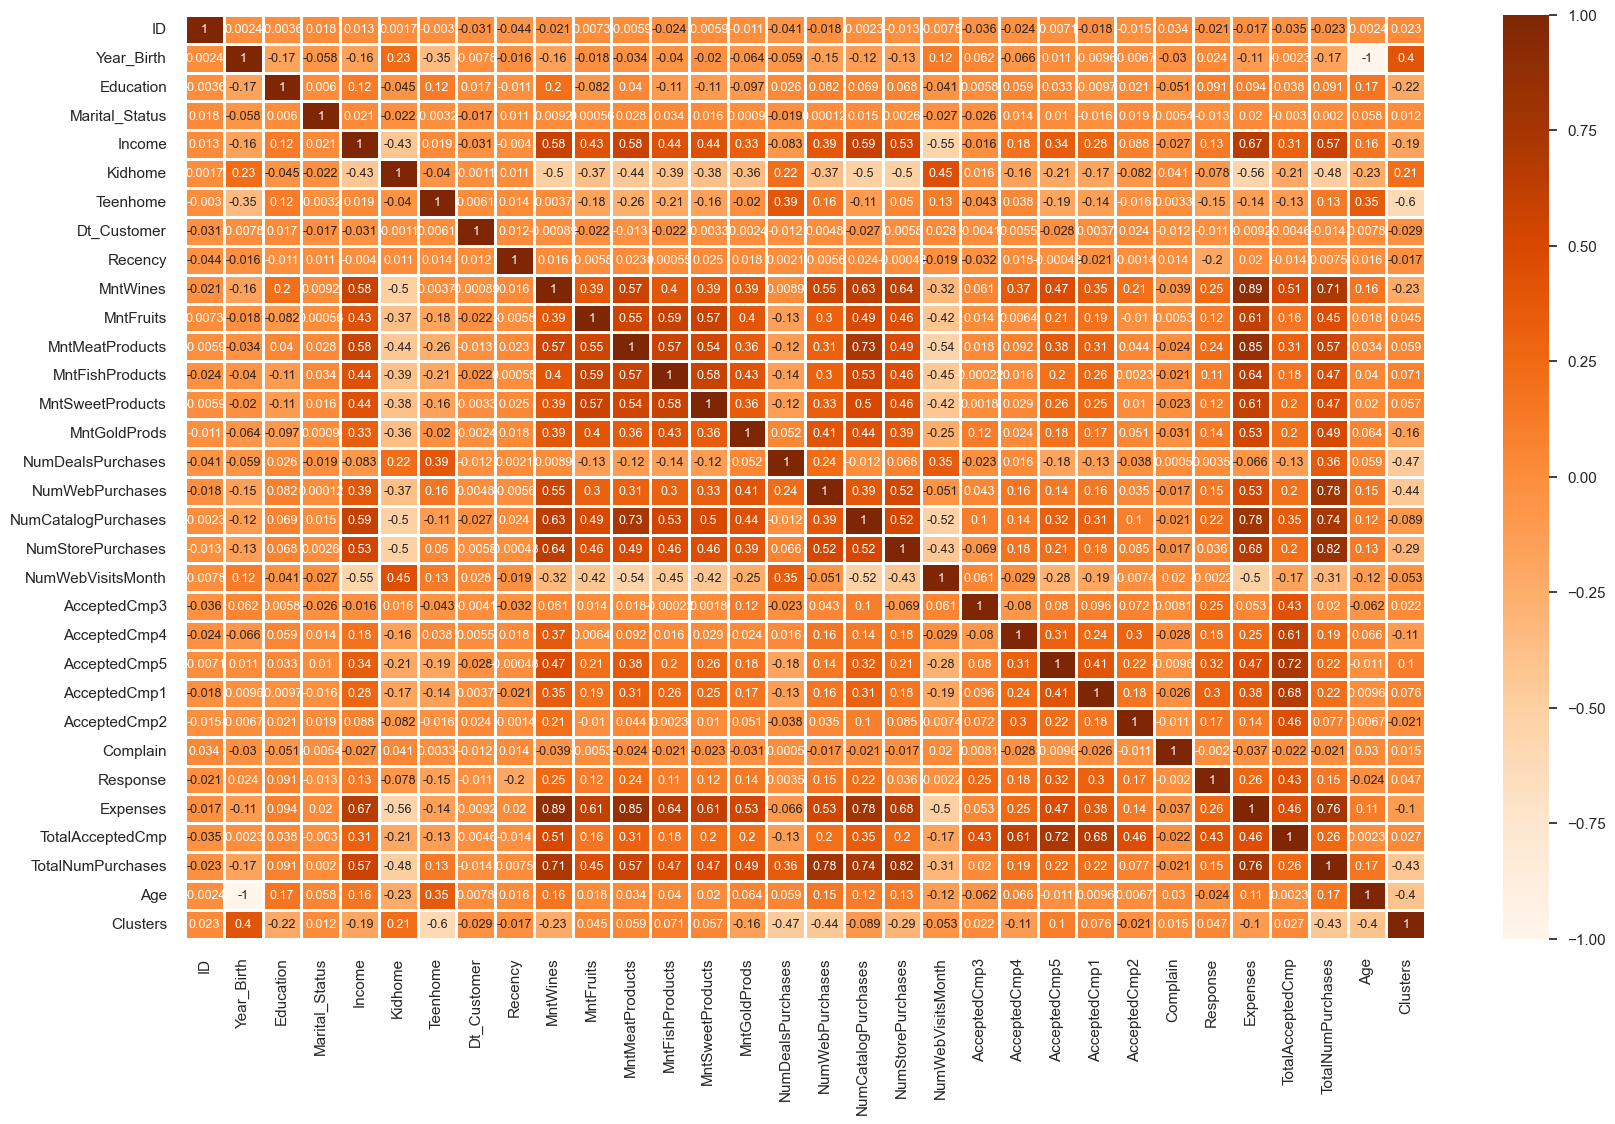

In [90]:
# Plotting the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='Oranges', linewidths=1, annot_kws={"size": 9})


<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">📝</span> 8. CONCLUSION
    </h2>
</div>


In this project, I performed unsupervised clustering. I did use dimensionality reduction followed by agglomerative clustering. I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. This can be used in planning better marketing strategies.

If you liked this Notebook, please do upvote.

If you have any questions, feel free to comment!

Best Wishes!

<div style="background-color:#C40C0C; padding:10px; border-radius:8px; text-align:center;">
    <h2 style="color:white; font-weight:bold; margin:0;">
        <span style="font-size:25px;">✅</span> 9. END
    </h2>
</div>
